In [1]:
import pandas as pd
import numpy as np

In [2]:
df_artist_collab = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artist Collaboration Network/global/entire-table-preprocessing.csv",converters={"song_ids": lambda x: x.strip("[]").replace("'","").split(", ")})
df_artist_collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist_1  3061 non-null   object
 1   artist_2  3061 non-null   object
 2   count     3061 non-null   int64 
 3   song_ids  3061 non-null   object
dtypes: int64(1), object(3)
memory usage: 95.8+ KB


In [3]:
df_artist_collab = df_artist_collab.explode('song_ids',ignore_index=True)
df_artist_collab


,artist_1,artist_2,count,song_ids
0,Dalex,Lenny Tavárez,11,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,11,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,11,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,11,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,11,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...,...
4185,Manuel Turizo,Zion & Lennox,1,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,1,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,1,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,1,0AluA5RNsa4Cx6XRhf2hWZ


In [4]:
# %%
df_artist_collab.drop('count', axis=1,inplace=True)
df_artist_collab.rename(columns={"song_ids":"song_id"},inplace=True)
df_artist_collab



,artist_1,artist_2,song_id
0,Dalex,Lenny Tavárez,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...
4185,Manuel Turizo,Zion & Lennox,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,0AluA5RNsa4Cx6XRhf2hWZ


In [5]:
# %%
df_song = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Hit Songs/spotify_hits_dataset_complete.csv",converters={"artist_name": lambda x: x.strip("[]").replace("'","").split(", ")},sep="\t")
df_song = df_song[df_song["song_type"] != "Solo"]
df_song = df_song.reset_index(drop=True)

#df_song.drop("index",inplace=True)
df_song.head()

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3,0.0209,0.614,0.6410,0.000000,0.0659,-6.751,0.2880,0.4920,123.539
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,4,0.9690,0.150,0.0577,0.363000,0.0873,-21.255,0.0362,0.0701,71.564
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,4,0.0640,0.572,0.7970,0.000000,0.1050,-3.995,0.0483,0.2520,135.006
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,4,0.2800,0.610,0.3970,0.000000,0.0833,-8.506,0.0504,0.7180,129.761
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,4,0.1630,0.827,0.5220,0.000001,0.1090,-4.866,0.0845,0.4770,151.990


In [6]:
df_song.shape

(4987, 24)

# Artist table load

In [7]:
df_artists=pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artists/spotify_artists_info_complete.csv", sep="\t")
df_artists.drop("image_url",axis=1,inplace=True)
df_artists.rename(columns={"name":"artist_name"},inplace=True)
df_artists.head()

,artist_id,artist_name,followers,popularity,genres
0,1WgXqy2Dd70QQOU7Ay074N,AURORA,923204,75,['norwegian pop']
1,2dXKh2aHr7RS2RVPlWJoUS,MHD,2707,24,[]
2,293zczrfYafIItmnmM3coR,Chuck Berry,1103439,67,"['blues rock', 'classic rock', 'folk rock', 'r..."
3,4DqRDyrUuJO8CuxfgVCU3m,Hasan.K,38,29,[]
4,1U5zgr455OGyIkLNXvDdrf,Traditional,26672,64,['sleep']


In [8]:
df_artists.shape

(3612, 5)

# Combining as 2 artist per song

In [9]:
import pandas as pd
from itertools import combinations

# Assuming merged_df is the DataFrame with columns artist_1, artist_2, and artist_name

# Create an empty list to store the new DataFrames
new_dfs = []

# Define a function to process each row
def fill_artists(row):
    artists_list = row['artist_name']
    if artists_list:
        if len(artists_list) == 2:
            # If there are 2 artists, fill artist_1 and artist_2 accordingly
            row['artist_1'] = artists_list[0]
            row['artist_2'] = artists_list[1]
            new_dfs.append(row.to_frame().transpose())
        elif len(artists_list) > 2:
            # If there are more than 2 artists, create new rows for each combination
            top_artists = sorted(artists_list, key=lambda x: df_artists[df_artists['artist_name'].isin(artists_list)]['followers'].max(), reverse=True)[:2]
            row['artist_1'] = top_artists[0]
            row['artist_2'] = top_artists[1]
            new_dfs.append(row.to_frame().transpose())
    else:
        new_dfs.append(row.to_frame().transpose())

# Apply the function to each row of the DataFrame
df_song.apply(fill_artists, axis=1)

# Concatenate the new DataFrames into a single DataFrame
new_rows_df = pd.concat(new_dfs, ignore_index=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4982  26bMmC90QF0FOd1ctDnkeU   
4983  1oBsrVp5CpLVpxX0WdHQvt   
4984  4W598w0KcHVG5Nwqk0qMpj   
4985  3at8iNHLzE5EizkFWoQzCK   
4986  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4982                                  Mulherão da Porra   
4983                                             Dealer   
4984                                              Three   
4985                     

In [10]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4983,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4984,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4985,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [11]:
new_rows_df.isna().sum()

song_id                   0
song_name                18
artist_id                 0
artist_name               0
popularity                0
explicit                  0
song_type                 0
track_number              0
num_artists               0
num_available_markets     0
release_date              0
duration_ms               0
key                       0
mode                      0
time_signature            0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness               0
valence                   0
tempo                     0
artist_1                  0
artist_2                  0
dtype: int64

In [12]:
new_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                4987 non-null   object
 1   song_name              4969 non-null   object
 2   artist_id              4987 non-null   object
 3   artist_name            4987 non-null   object
 4   popularity             4987 non-null   object
 5   explicit               4987 non-null   object
 6   song_type              4987 non-null   object
 7   track_number           4987 non-null   object
 8   num_artists            4987 non-null   object
 9   num_available_markets  4987 non-null   object
 10  release_date           4987 non-null   object
 11  duration_ms            4987 non-null   object
 12  key                    4987 non-null   object
 13  mode                   4987 non-null   object
 14  time_signature         4987 non-null   object
 15  acousticness         

In [13]:
new_rows_df[new_rows_df['song_name'].isna()]

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
235,5TTzhRSWQS4Yu8xTgAuq6D,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,13,2,0,...,0.465,0.82,0.0,0.0888,-5.907,0.307,0.505,86.839,,
486,5rbXOUQCaYcSnW5EOgfVaD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,19,2,0,...,0.789,0.794,0.0,0.108,-5.876,0.1,0.334,108.852,,
596,4nbg6j4t38jiFdwXt3kiLQ,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,15,2,0,...,0.419,0.688,0.0,0.104,-7.332,0.361,0.149,79.145,,
603,20yDAohnjeOlLpnogPhnCO,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,12,2,0,...,0.485,0.693,0.0,0.49,-6.478,0.288,0.567,89.568,,
1054,5WkVuwmvmbmysXlKtdfkRD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,11,2,0,...,0.608,0.631,0.000001,0.287,-7.096,0.414,0.146,119.201,,
1216,7CbkW1lLxOM5D6YWTnzknv,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,9,2,0,...,0.547,0.881,0.0,0.386,-5.994,0.31,0.44,86.628,,
1227,1xSTaiXN33Y5chE2bFixVo,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,1,2,0,...,0.426,0.722,0.0,0.117,-5.112,0.388,0.393,93.014,,
1716,2ohk9OZFaYwo8UrRm3ewqq,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,14,2,0,...,0.526,0.717,0.0,0.117,-6.744,0.439,0.354,147.437,,
2734,667XbVuYeoYAVUBzB9Z7Q8,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,17,2,0,...,0.492,0.688,0.0,0.0566,-6.913,0.316,0.29,175.801,,
3191,34IY2117PizF4NoRPoMth6,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,3,2,0,...,0.727,0.757,0.0,0.115,-5.785,0.14,0.647,150.002,,


In [14]:
# Assuming new_rows_df is the DataFrame you want to modify

# Drop rows where song_name is NaN
new_rows_df.dropna(subset=['song_name'], inplace=True)

# Reset the index after dropping rows
new_rows_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4964  26bMmC90QF0FOd1ctDnkeU   
4965  1oBsrVp5CpLVpxX0WdHQvt   
4966  4W598w0KcHVG5Nwqk0qMpj   
4967  3at8iNHLzE5EizkFWoQzCK   
4968  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4964                                  Mulherão da Porra   
4965                                             Dealer   
4966                                              Three   
4967                     

In [15]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4965,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4966,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4967,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [16]:
merged_df_with_artist1 = pd.merge(new_rows_df,df_artists,left_on='artist_1', right_on='artist_name')
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_y,artist_name_y,followers,popularity_y,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [17]:
merged_df_with_artist1.rename(columns={"artist_id_y":"artist_id_1", "artist_name_y":"artist_name_1","followers":"followers_artist1","popularity":"popularity_artist1","genres":"genres_artist1"},inplace=True)
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [18]:
merged_df_with_artist2 = pd.merge(merged_df_with_artist1,df_artists,left_on='artist_2', right_on='artist_name')
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id,artist_name,followers,popularity,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [19]:
merged_df_with_artist2.rename(columns={"artist_id":"artist_id_2","artist_name":"artist_name_2","followers":"followers_artist2","popularity":"popularity_artist2","genres":"genres_artist2"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id_2,artist_name_2,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [20]:
merged_df_with_artist2.isna().sum()

song_id                  0
song_name                0
artist_id_x              0
artist_name_x            0
popularity_x             0
explicit                 0
song_type                0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
artist_id_1              0
artist_name_1            0
followers_artist1        0
popularity_y             0
genres_artist1           0
artist_id_2              0
artist_name_2            0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [21]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5180
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                5181 non-null   object
 1   song_name              5181 non-null   object
 2   artist_id_x            5181 non-null   object
 3   artist_name_x          5181 non-null   object
 4   popularity_x           5181 non-null   object
 5   explicit               5181 non-null   object
 6   song_type              5181 non-null   object
 7   track_number           5181 non-null   object
 8   num_artists            5181 non-null   object
 9   num_available_markets  5181 non-null   object
 10  release_date           5181 non-null   object
 11  duration_ms            5181 non-null   object
 12  key                    5181 non-null   object
 13  mode                   5181 non-null   object
 14  time_signature         5181 non-null   object
 15  acousticness         

In [22]:
merged_df_with_artist2.drop(["artist_id_x","song_type","artist_id_1","artist_name_1","artist_id_2","artist_name_2"],axis=1,inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,popularity_x,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [23]:
merged_df_with_artist2.rename(columns={"popularity_x":"song_popularity"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [24]:
merged_df_with_artist2.rename(columns={"artist_name_x":"artist_name_list","popularity_y":"popularity_artist1"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_list,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [25]:
duplicate_values = merged_df_with_artist2['song_id'].duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5176    False
5177    False
5178    False
5179    False
5180    False
Name: song_id, Length: 5181, dtype: bool


In [26]:
boolean = not merged_df_with_artist2["song_id"].is_unique      # True (credit to @Carsten)
boolean = merged_df_with_artist2['song_id'].duplicated().any() # True
boolean

True

# Remove identifiers

In [27]:
merged_df_with_artist2.drop(["song_id","song_name","artist_name_list"],axis=1,inplace=True)
merged_df_with_artist2

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,62,True,1,3,79,2019-02-21,163246,5,0,4,...,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5177,54,False,1,2,76,2017-06-02,201240,6,1,4,...,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5178,2,False,2,2,0,2016-06-03,212693,9,0,4,...,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5179,20,False,1,2,79,2018-12-21,178316,6,1,4,...,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


In [28]:
merged_df_with_artist2.columns

Index(['song_popularity', 'explicit', 'track_number', 'num_artists',
       'num_available_markets', 'release_date', 'duration_ms', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_1', 'artist_2', 'followers_artist1',
       'popularity_artist1', 'genres_artist1', 'followers_artist2',
       'popularity_artist2', 'genres_artist2'],
      dtype='object')

In [29]:
pd.set_option('display.max_columns', None)
merged_df_with_artist2.head()

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [30]:
merged_df_with_artist2.shape

(5181, 27)

In [31]:
merged_df_with_artist2.to_csv("Preprocessed_table-v1.csv")

In [32]:
merged_df_with_artist2.drop_duplicates(keep=False, inplace=True) 

In [33]:
merged_df_with_artist2.reset_index(drop=True, inplace=True)

In [34]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_popularity        5179 non-null   object
 1   explicit               5179 non-null   object
 2   track_number           5179 non-null   object
 3   num_artists            5179 non-null   object
 4   num_available_markets  5179 non-null   object
 5   release_date           5179 non-null   object
 6   duration_ms            5179 non-null   object
 7   key                    5179 non-null   object
 8   mode                   5179 non-null   object
 9   time_signature         5179 non-null   object
 10  acousticness           5179 non-null   object
 11  danceability           5179 non-null   object
 12  energy                 5179 non-null   object
 13  instrumentalness       5179 non-null   object
 14  liveness               5179 non-null   object
 15  loudness             

In [35]:
# to remove or keep track_number, num_artists, num_available_markets, artist_1, artist_2 names?
# to convert release_date to year,month, date 
# one hot encoding: explicit, genres_artist_1, genres_artist_2 
# standardize numerical features

In [36]:
merged_df_with_artist2.isna().sum()

song_popularity          0
explicit                 0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
followers_artist1        0
popularity_artist1       0
genres_artist1           0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [37]:
merged_df_with_artist2.to_csv("Preprocessed dataset - without duplicates.csv")

# Remove irrelevant features:

These are the features that were removed using domain (music industry) knowledge.
Columns to be removed:
- num_available_markets => not needed. Not useful in determining. And this is not fixed. Can be changed anytime by the artist
- num_artists - this is a study of collaboration between 2 artists. There are about 50 rows with collaboration between more than 2 artists. Dropping this columns as well because it would not be useful and thus we want to remove it as a potential feature

In [38]:
merged_df_with_artist2.drop(columns=["num_artists"], axis=1,inplace=True)

In [39]:
merged_df_with_artist2

,song_popularity,explicit,track_number,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,2019-02-21,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5175,54,False,1,76,2017-06-02,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5176,2,False,2,0,2016-06-03,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5177,20,False,1,79,2018-12-21,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


## PREPROCESSING

In [40]:
preprocessing_df = merged_df_with_artist2

In [41]:
preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,2019-02-21,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5175,54,False,1,76,2017-06-02,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5176,2,False,2,0,2016-06-03,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5177,20,False,1,79,2018-12-21,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


In [42]:
# Helper utility function
def datetime_transformer(df, datetime_vars):
    """
    The datetime transformer

    Parameters
    ----------
    df : the dataframe
    datetime_vars : the datetime variables
    
    Returns
    ----------
    The dataframe where datetime_vars are transformed into the following 6 datetime types:
    year, month, day, hour, minute and second
    """
    
    # The dictionary with key as datetime type and value as datetime type operator
    dict_ = {'year'   : lambda x : x.dt.year,
             'month'  : lambda x : x.dt.month,
             'day'    : lambda x : x.dt.day,
             'hour'   : lambda x : x.dt.hour,
             'minute' : lambda x : x.dt.minute,
             'second' : lambda x : x.dt.second}
    
    # Make a copy of df
    df_datetime = df.copy(deep=True)
    
    # For each variable in datetime_vars
    for var in datetime_vars:
        # Cast the variable to datetime
        df_datetime[var] = pd.to_datetime(df_datetime[var])
        
        # For each item (datetime_type and datetime_type_operator) in dict_
        for datetime_type, datetime_type_operator in dict_.items():
            # Add a new variable to df_datetime where:
            # the variable's name is var + '_' + datetime_type
            # the variable's values are the ones obtained by datetime_type_operator
            df_datetime[var + '_' + datetime_type] = datetime_type_operator(df_datetime[var])
            
    # Remove datetime_vars from df_datetime
    df_datetime = df_datetime.drop(columns=datetime_vars)
                
    return df_datetime

In [43]:
# Get the date time variables
datetime_vars = ["release_date"]
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
preprocessing_df = datetime_transformer(preprocessing_df, datetime_vars)


In [44]:
preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,6,21,0,0,0
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,6,13,0,0,0
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,11,22,0,0,0
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2018,11,9,0,0,0
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2017,3,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[],2019,2,21,0,0,0
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']",2017,6,2,0,0,0
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']",2016,6,3,0,0,0
5177,20,False,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi...",2018,12,21,0,0,0


In [45]:
# Converting string to list in columns genres_artist1 and genres_artist2
# takes a while to run
import ast
for i in range(len(preprocessing_df)):
#     preprocessing_df["genres_artist1"]=(ast.literal_eval(preprocessing_df.genres_artist1[0])))
    preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
    preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])

/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_85798/3512815082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_85798/3512815082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])


### One hot encoding for genres_list of artist 1

In [46]:
cat_preprocessing_df=preprocessing_df
cat_preprocessing_df.head()

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0


In [47]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist1']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

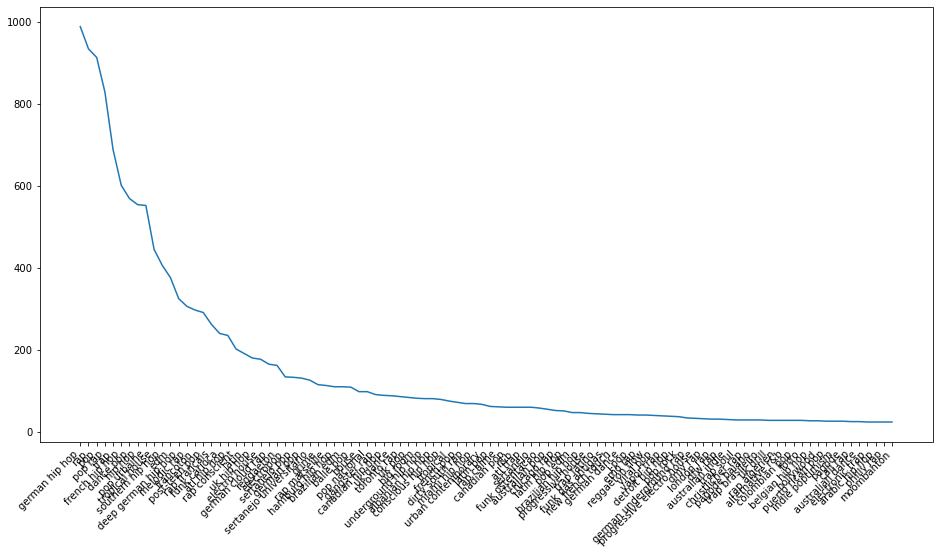

In [48]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 100]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer


In [50]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist1'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist1_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5177,20,False,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### For Artist 2

In [51]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist2']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

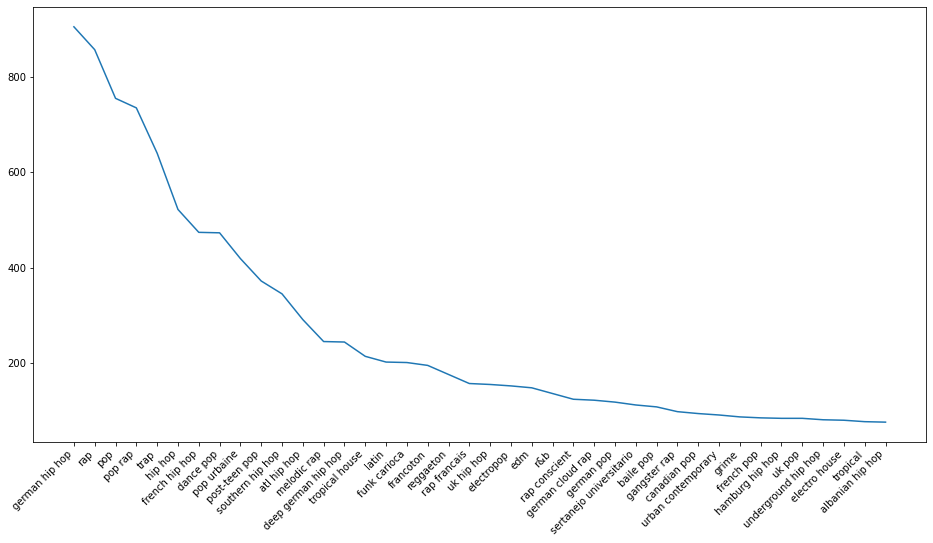

In [52]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 40]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [53]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist2'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist2_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,[],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5177,20,False,1,79,1783

In [54]:
# One hot encoding for explicit column
cat_preprocessing_df = pd.get_dummies(cat_preprocessing_df, columns = ['explicit']) 
cat_preprocessing_df.head()

,song_popularity,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1


In [55]:
cat_preprocessing_df.drop(columns=["artist_1","artist_2","genres_artist1","genres_artist2","top_genres"],axis=1, inplace=True)

In [56]:
cat_preprocessing_df

,song_popularity,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,4543729,89,2905370,88,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,146136,72,2905370,88,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,62590,57,5132,48,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,186798,59,56258,49,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,629,13,1977867,66,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
cat_preprocessing_df.dtypes

song_popularity             object
track_number                object
num_available_markets       object
duration_ms                 object
key                         object
                             ...  
artist2_southern hip hop     int64
artist2_trap                 int64
artist2_tropical house       int64
explicit_False               uint8
explicit_True                uint8
Length: 62, dtype: object

In [58]:
cat_preprocessing_df = cat_preprocessing_df.apply(pd.to_numeric, errors='coerce')
cat_preprocessing_df.dtypes

song_popularity             int64
track_number                int64
num_available_markets       int64
duration_ms                 int64
key                         int64
                            ...  
artist2_southern hip hop    int64
artist2_trap                int64
artist2_tropical house      int64
explicit_False              uint8
explicit_True               uint8
Length: 62, dtype: object

In [59]:
cat_preprocessing_df

,song_popularity,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,79,193933,5,1,4,0.1740,0.780,0.679,0.0000,0.1270,-4.554,0.0881,0.470,139.978,4543729,89,2905370,88,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,79,185828,7,1,4,0.5670,0.678,0.477,0.0000,0.1100,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0000,0.0641,-6.030,0.0677,0.208,146.991,146136,72,2905370,88,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,79,163246,5,0,4,0.2400,0.764,0.468,0.0000,0.2520,-9.181,0.4460,0.756,77.044,62590,57,5132,48,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,76,201240,6,1,4,0.4480,0.767,0.862,0.0000,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.1110,-8.136,0.0376,0.184,96.008,186798,59,56258,49,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,79,178316,6,1,4,0.3080,0.603,0.900,0.0000,0.5070,-3.079,0.0792,0.861,156.193,629,13,1977867,66,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the data
preprocessing_df_numerical = ss.fit_transform(cat_preprocessing_df)
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652, -1.65650022, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064,  0.63350963, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643,  0.63350963, ..., -0.20760952,
         1.15087197, -1.15087197]])

In [61]:
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467,  0.63350963, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652, -1.65650022, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064,  0.63350963, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643,  0.63350963, ..., -0.20760952,
         1.15087197, -1.15087197]])

## Gephi Metrics

In [62]:
# getting metrics from Gephi
import pandas as pd
from collections import Counter

# Sample data
artist_data = {'artist': ['Artist1', 'Artist2', 'Artist3'],
               'genres': [['trap soul', 'uk drill', 'uk hip hop','grime'],
                          ['trap soul', 'uk hip hop', 'grime'],
                          ['uk hip hop', 'grime']]}

# Genre to modularity class mapping
genre_modularity_mapping = {'trap soul': 5, 'uk drill': 5, 'uk hip hop': 5}#, 'grime': 0}

# Create the first dataframe
df_artists_test = pd.DataFrame(artist_data)

def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, -1) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    return modularity_class[0]

# Apply the function to each row
df_artists_test['modularity_class'] = df_artists_test['genres'].apply(calculate_modularity_class)

# Display the resulting dataframe
print(df_artists_test)

    artist                                    genres  modularity_class
0  Artist1  [trap soul, uk drill, uk hip hop, grime]                 5
1  Artist2            [trap soul, uk hip hop, grime]                 5
2  Artist3                       [uk hip hop, grime]                 5


In [63]:
import csv

reader = csv.DictReader(open('node-table-modularity_class_8.csv'))
genre_modularity_mapping={}
for row in reader:
    genre_modularity_mapping[row['Label']] = int(row['modularity_class'])
print(genre_modularity_mapping)

{'latin': 0, 'reggaeton': 0, 'pop rap': 1, 'rap': 1, 'trap': 1, 'hip hop': 1, 'tropical': 0, 'trap latino': 0, 'pop': 2, 'dance pop': 2, 'reggaeton flow': 0, 'post-teen pop': 2, 'latin hip hop': 0, 'tropical house': 2, 'southern hip hop': 1, 'underground hip hop': 1, 'melodic rap': 1, 'edm': 2, 'electropop': 2, 'atl hip hop': 1, 'trap argentino': 0, 'panamanian pop': 0, 'latin pop': 0, 'colombian pop': 0, 'german hip hop': 3, 'r&b en espanol': 0, 'vapor trap': 1, 'nc hip hop': 1, 'atl trap': 1, 'puerto rican pop': 0, 'uk pop': 2, 'miami hip hop': 1, 'conscious hip hop': 1, 'electro house': 2, 'uk dance': 2, 'deep german hip hop': 3, 'gangster rap': 1, 'r&b': 1, 'canadian pop': 1, 'cali rap': 1, 'rap latina': 0, 'pop reggaeton': 0, 'house': 2, 'canadian hip hop': 1, 'trap soul': 1, 'baile pop': 0, 'funk carioca': 0, 'dirty south rap': 1, 'toronto rap': 1, 'dfw rap': 1, 'moombahton': 2, 'queens hip hop': 1, 'big room': 2, 'argentine hip hop': 0, 'alternative r&b': 2, 'bmore': 2, 'ninja':

In [64]:
preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]"
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]"
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]"
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]"
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]"
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi..."
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]"
5177,20,False,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[]


In [65]:
def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, -1) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    # If there's a tie, choose the first modularity class
    if len(modularity_class) > 1:
        return modularity_class[0]
    else:
        # If there's no majority, choose the one that is not -1
        for mod_class in modularity_class:
            if mod_class != -1:
                return mod_class
        
        # If all are -1, return -1
        return -1

# Apply the function to each row
preprocessing_df['modularity_class_artist1'] = preprocessing_df['genres_artist1'].apply(calculate_modularity_class)
preprocessing_df['modularity_class_artist2'] = preprocessing_df['genres_artist2'].apply(calculate_modularity_class)

# Display the resulting dataframe
preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,modularity_class_artist1,modularity_class_artist2
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]",1,1
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]",1,1
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]",1,1
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]",1,1
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",-1,-1
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",2,2
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",-1,-1
5177,20,False,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[],-1,0


In [66]:
preprocessing_df[preprocessing_df["modularity_class_artist2"]==-1]

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,modularity_class_artist1,modularity_class_artist2
48,50,True,13,79,728413,10,1,4,0.154,0.529,0.799,0.0,0.0858,-7.025,0.166,0.354,104.054,Logic,Neil deGrasse Tyson,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",5078,37,[],2017,5,5,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
49,55,True,5,79,198106,10,1,4,0.139,0.546,0.871,0.000083,0.104,-5.81,0.148,0.303,189.723,Logic,Ryan Tedder,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",19685,61,[],2018,9,28,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
50,53,True,1,79,199866,10,1,4,0.118,0.529,0.871,0.000164,0.115,-5.831,0.155,0.272,189.837,Logic,Ryan Tedder,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",19685,61,[],2018,7,27,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
51,62,True,12,79,331266,1,1,4,0.111,0.622,0.867,0.000104,0.346,-5.298,0.0893,0.339,140.011,Logic,Damian Lemar Hudson,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",3570,48,[],2017,5,5,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
68,52,True,11,79,260213,2,1,4,0.0898,0.626,0.852,0.0,0.354,-6.261,0.303,0.731,94.905,Logic,Kajo,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",142,37,[],2018,9,28,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,52,True,6,79,244687,6,0,4,0.484,0.711,0.735,0.0,0.34,-8.038,0.0943,0.668,128.064,Alligatoah,Felix Brummer,793181,68,"[deep german hip hop, german pop]",895,40,[],2018,9,14,0,0,0,"[deep german hip hop, Others]",3,-1
5171,4,False,1,0,194621,8,0,4,0.241,0.702,0.67,0.000012,0.202,-7.288,0.111,0.51,118.987,SRTW,Charity Children,7171,59,"[pop edm, tropical house]",5761,46,[german indie],2016,11,25,0,0,0,"[Others, tropical house]",2,-1
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",-1,-1
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",-1,-1


In [67]:
preprocessing_df.drop(columns=["release_date_minute","release_date_hour","release_date_second","top_genres"],axis=1,inplace=True)

In [68]:
preprocessing_df

,song_popularity,explicit,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2
0,58,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,1,1
1,47,True,1,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,1,1
2,61,True,12,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,1,1
3,58,True,15,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,1,1
4,41,True,6,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,-1,-1
5175,54,False,1,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,2,2
5176,2,False,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,-1,-1
5177,20,False,1,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,-1,0


In [69]:
preprocessing_df.columns

Index(['song_popularity', 'explicit', 'track_number', 'num_available_markets',
       'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'artist_1', 'artist_2',
       'followers_artist1', 'popularity_artist1', 'genres_artist1',
       'followers_artist2', 'popularity_artist2', 'genres_artist2',
       'release_date_year', 'release_date_month', 'release_date_day',
       'modularity_class_artist1', 'modularity_class_artist2'],
      dtype='object')

In [70]:
preprocessing_df = preprocessing_df.apply(pd.to_numeric, errors='coerce')
preprocessing_df.dtypes

song_popularity               int64
explicit                       bool
track_number                  int64
num_available_markets         int64
duration_ms                   int64
key                           int64
mode                          int64
time_signature                int64
acousticness                float64
danceability                float64
energy                      float64
instrumentalness            float64
liveness                    float64
loudness                    float64
speechiness                 float64
valence                     float64
tempo                       float64
artist_1                    float64
artist_2                    float64
followers_artist1             int64
popularity_artist1            int64
genres_artist1              float64
followers_artist2             int64
popularity_artist2            int64
genres_artist2              float64
release_date_year             int64
release_date_month            int64
release_date_day            

# Feature Selection

In [71]:
# CORRELATION BETWEEN VARIABLES
import pandas as pd

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Calculate correlation matrix
correlation_matrix = preprocessing_df.corr()

# Calculate absolute correlation with the target variable
correlation_with_target = correlation_matrix['song_popularity'].abs()

# Sort the features by their correlation with the target variable in descending order
sorted_features = correlation_with_target.sort_values(ascending=False)

# Print the significant features
print("Significant features based on correlation with song_popularity:")
print(sorted_features)

Significant features based on correlation with song_popularity:
song_popularity             1.000000
num_available_markets       0.781664
popularity_artist1          0.220431
popularity_artist2          0.218334
followers_artist1           0.121132
followers_artist2           0.119330
modularity_class_artist1    0.117966
release_date_year           0.104251
modularity_class_artist2    0.067139
release_date_month          0.055866
energy                      0.055411
speechiness                 0.043801
explicit                    0.037870
danceability                0.023019
duration_ms                 0.022961
track_number                0.021812
valence                     0.020589
release_date_day            0.019353
time_signature              0.016613
tempo                       0.012381
instrumentalness            0.010278
key                         0.009808
mode                        0.009771
loudness                    0.008029
liveness                    0.006470
acousticnes

In [72]:
# FEATURE SELECTION using RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Assuming X contains the features and y contains the target variable
# Replace these with your actual feature and target variable
X = preprocessing_df.drop(columns=['song_popularity',"artist_1","artist_2","genres_artist1","genres_artist2"], axis=1)  # Features
y = preprocessing_df['song_popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE
# Specify the number of features to select (e.g., 15 in this example)
num_features_to_select = 15
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)


# Fit RFE and get the selected features
fit = rfe.fit(X_train, y_train)

print("Selected Features:")
selected_features = X.columns[fit.support_]
print(selected_features)

# Print the feature ranking in descending order
print("Feature Ranking (Descending Order):")
feature_ranking = sorted(list(zip(X.columns, fit.ranking_)), key=lambda x: x[1], reverse=True)
for feature, rank in feature_ranking:
    print(f"Feature: {feature}, Rank: {rank}")

Selected Features:
Index(['explicit', 'track_number', 'num_available_markets', 'mode',
       'time_signature', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'valence', 'popularity_artist1',
       'release_date_month', 'modularity_class_artist1',
       'modularity_class_artist2'],
      dtype='object')
Feature Ranking (Descending Order):
Feature: followers_artist1, Rank: 11
Feature: followers_artist2, Rank: 10
Feature: duration_ms, Rank: 9
Feature: loudness, Rank: 8
Feature: tempo, Rank: 7
Feature: key, Rank: 6
Feature: danceability, Rank: 5
Feature: release_date_day, Rank: 4
Feature: release_date_year, Rank: 3
Feature: popularity_artist2, Rank: 2
Feature: explicit, Rank: 1
Feature: track_number, Rank: 1
Feature: num_available_markets, Rank: 1
Feature: mode, Rank: 1
Feature: time_signature, Rank: 1
Feature: acousticness, Rank: 1
Feature: energy, Rank: 1
Feature: instrumentalness, Rank: 1
Feature: liveness, Rank: 1
Feature: speechiness, Rank: 1
Featur

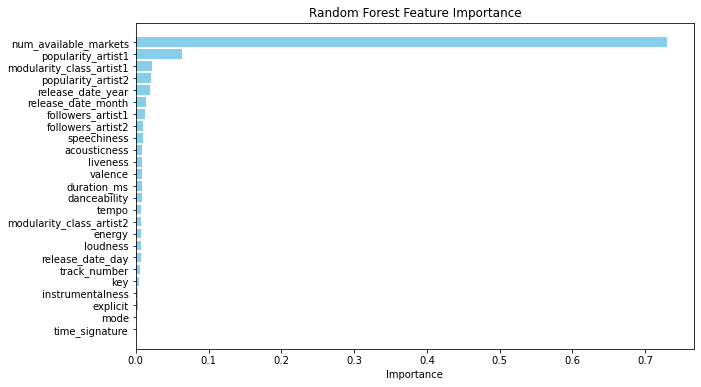

Feature Importance:
                     Feature  Importance
2      num_available_markets    0.730334
17        popularity_artist1    0.063519
23  modularity_class_artist1    0.021812
19        popularity_artist2    0.021178
20         release_date_year    0.019623
21        release_date_month    0.013333
16         followers_artist1    0.013148
18         followers_artist2    0.010381
13               speechiness    0.010222
7               acousticness    0.008702
11                  liveness    0.008680
14                   valence    0.008624
3                duration_ms    0.008212
8               danceability    0.007910
15                     tempo    0.007741
24  modularity_class_artist2    0.007714
9                     energy    0.007346
12                  loudness    0.007139
22          release_date_day    0.006902
1               track_number    0.005526
4                        key    0.004445
10          instrumentalness    0.003581
0                   explicit    0.002

In [73]:
# random forest feature importance

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the model (Random Forest Regressor)
randome_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
randome_forest_model.fit(X, y)

# Get feature importances
feature_importances = randome_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

# Print feature importances
print("Feature Importance:")
print(feature_importance_df)

# Converting explicit categorical variable into numerical using pd.get_dummies

In [74]:
# pd.get dummies on explicit columns
X_train=pd.get_dummies(X_train,columns=["explicit"])
X_train

,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2,explicit_False,explicit_True
4944,1,79,338660,2,0,4,0.12800,0.602,0.612,0.001870,0.2210,-7.074,0.0292,0.356,95.002,103240,52,29356,41,2018,12,5,-1,-1,1,0
1183,2,79,220800,11,0,4,0.05350,0.649,0.597,0.000000,0.2010,-5.367,0.0911,0.347,149.980,460534,64,3765,62,2019,4,19,3,3,0,1
1049,1,79,176416,8,1,4,0.00548,0.605,0.664,0.000003,0.2040,-7.162,0.0316,0.164,103.997,794013,79,15948075,90,2019,5,30,2,2,1,0
1330,6,3,237586,7,1,4,0.23200,0.776,0.758,0.000000,0.1240,-6.636,0.2900,0.354,145.968,2262360,75,1054676,69,2018,3,23,3,3,0,1
2223,1,0,196400,4,0,4,0.01750,0.669,0.574,0.002940,0.1460,-6.442,0.0286,0.273,120.013,3591545,87,19142628,92,2018,9,19,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,0,120346,8,0,4,0.50100,0.666,0.671,0.000004,0.3160,-8.522,0.0577,0.964,180.096,5556,42,77,29,2019,7,12,-1,-1,1,0
466,2,79,162268,7,0,4,0.28800,0.821,0.636,0.000000,0.1040,-6.038,0.0899,0.400,142.008,3879825,92,1989635,90,2018,10,5,1,1,0,1
3092,5,79,273893,1,0,3,0.39700,0.829,0.839,0.000000,0.1380,-6.012,0.3140,0.401,101.256,727275,74,7561,32,2018,3,9,3,-1,0,1
3772,2,79,210533,7,1,4,0.15900,0.734,0.751,0.000000,0.3070,-4.916,0.0684,0.650,84.011,332304,63,1482590,68,2017,11,3,3,3,1,0


In [75]:
X_train.drop(columns=["explicit_False"],axis=1, inplace=True)
X_train

,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2,explicit_True
4944,1,79,338660,2,0,4,0.12800,0.602,0.612,0.001870,0.2210,-7.074,0.0292,0.356,95.002,103240,52,29356,41,2018,12,5,-1,-1,0
1183,2,79,220800,11,0,4,0.05350,0.649,0.597,0.000000,0.2010,-5.367,0.0911,0.347,149.980,460534,64,3765,62,2019,4,19,3,3,1
1049,1,79,176416,8,1,4,0.00548,0.605,0.664,0.000003,0.2040,-7.162,0.0316,0.164,103.997,794013,79,15948075,90,2019,5,30,2,2,0
1330,6,3,237586,7,1,4,0.23200,0.776,0.758,0.000000,0.1240,-6.636,0.2900,0.354,145.968,2262360,75,1054676,69,2018,3,23,3,3,1
2223,1,0,196400,4,0,4,0.01750,0.669,0.574,0.002940,0.1460,-6.442,0.0286,0.273,120.013,3591545,87,19142628,92,2018,9,19,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,0,120346,8,0,4,0.50100,0.666,0.671,0.000004,0.3160,-8.522,0.0577,0.964,180.096,5556,42,77,29,2019,7,12,-1,-1,0
466,2,79,162268,7,0,4,0.28800,0.821,0.636,0.000000,0.1040,-6.038,0.0899,0.400,142.008,3879825,92,1989635,90,2018,10,5,1,1,1
3092,5,79,273893,1,0,3,0.39700,0.829,0.839,0.000000,0.1380,-6.012,0.3140,0.401,101.256,727275,74,7561,32,2018,3,9,3,-1,1
3772,2,79,210533,7,1,4,0.15900,0.734,0.751,0.000000,0.3070,-4.916,0.0684,0.650,84.011,332304,63,1482590,68,2017,11,3,3,3,0


In [76]:
# pd.get dummies on explicit columns
X_test=pd.get_dummies(X_test,columns=["explicit"])
X_test.drop(columns=["explicit_False"],axis=1, inplace=True)
X_test

,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2,explicit_True
584,1,0,195000,6,0,4,0.2760,0.639,0.536,0.000000,0.0846,-6.328,0.0963,0.2650,139.902,197960,67,368987,70,2018,3,30,0,3,1
1215,1,79,180609,1,1,4,0.0681,0.809,0.871,0.000000,0.1110,-4.525,0.2800,0.5730,154.957,2444602,80,17479503,91,2019,9,26,1,2,1
877,7,69,160320,1,1,4,0.3540,0.799,0.381,0.000003,0.1350,-7.147,0.4640,0.0488,158.021,7771400,86,1562066,85,2017,10,30,1,1,1
4230,1,75,203906,7,1,4,0.0039,0.626,0.938,0.000452,0.5990,-3.005,0.0944,0.5180,124.932,1100976,77,40537,69,2016,12,2,2,2,0
4159,1,0,129680,5,0,5,0.7010,0.275,0.386,0.000000,0.1290,-10.473,0.0327,0.2660,152.790,561,53,199964,55,2017,8,25,-1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2,79,158554,11,0,4,0.5580,0.671,0.557,0.000000,0.1010,-7.710,0.2340,0.4140,93.996,1269136,80,1140736,80,2018,10,5,3,3,1
1740,1,0,183673,7,0,4,0.1620,0.632,0.409,0.000000,0.0948,-8.962,0.1440,0.2900,98.690,54765,56,6925190,75,2018,7,3,0,0,0
1717,1,79,194771,0,0,4,0.0748,0.648,0.795,0.000000,0.3800,-5.536,0.1700,0.5980,180.043,9080037,84,14506290,85,2019,10,30,0,-1,0
1454,4,0,148278,2,1,4,0.0646,0.901,0.676,0.000000,0.0863,-7.033,0.2510,0.4520,85.018,1931500,83,4108074,83,2019,3,22,1,1,1


## Standardization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_train = pd.DataFrame(scaled_x_train, columns =X_train.columns)
print("Scaled x_trains shape:",scaled_x_train.shape)
scaled_x_test = scaler.fit_transform(X_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns =X_train.columns)
print("Scaled x_test shape:",scaled_x_test.shape)

Scaled x_trains shape: (4143, 25)
Scaled x_test shape: (1036, 25)


In [78]:
scaled_x_train

,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2,explicit_True
0,-0.773058,0.633741,3.111515,-0.910590,-0.992545,0.023717,-0.434051,-0.867379,-0.481789,-0.066338,0.259404,-0.516944,-1.101618,-0.753092,-0.981919,-0.492744,-1.452970,-0.516177,-1.871030,0.108625,1.541663,-1.212822,-1.871483,-1.585657,-1.144837
1,-0.569565,0.633741,0.335467,1.531732,-0.992545,0.023717,-0.804175,-0.501709,-0.589275,-0.111946,0.127032,0.325405,-0.621830,-0.796472,0.995487,-0.448441,-0.611619,-0.519887,-0.583070,0.467219,-0.912322,0.339627,1.072159,1.163324,0.873487
2,-0.773058,0.633741,-0.709944,0.717625,1.007511,0.023717,-1.042743,-0.844038,-0.109171,-0.111873,0.146888,-0.560369,-1.083015,-1.678536,-0.658394,-0.407091,0.440069,1.791190,1.134209,0.467219,-0.605574,1.559407,0.336249,0.476079,-1.144837
3,0.244408,-1.570006,0.730841,0.446256,1.007511,0.023717,0.082631,0.486376,0.564408,-0.111946,-0.382599,-0.300805,0.919844,-0.762732,0.851187,-0.225020,0.159619,-0.367561,-0.153750,0.108625,-1.219070,0.783183,1.072159,1.163324,0.873487
4,-0.773058,-1.656996,-0.239245,-0.367851,-0.992545,0.023717,-0.983027,-0.346105,-0.754087,-0.040242,-0.236990,-0.205073,-1.106268,-1.153153,-0.082343,-0.060205,1.000970,2.254230,1.256872,0.108625,0.621419,0.339627,-0.399662,-0.211167,0.873487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,-0.773058,-1.656996,-2.030604,0.717625,-0.992545,0.023717,1.419050,-0.369446,-0.059011,-0.111859,0.888170,-1.231485,-0.880714,2.177481,2.078677,-0.504857,-2.154096,-0.520421,-2.607007,0.467219,0.007922,-0.436598,-1.871483,-1.585657,-1.144837
4139,-0.569565,0.633741,-1.043183,0.446256,-0.992545,0.023717,0.360845,0.836485,-0.309812,-0.111946,-0.514971,-0.005712,-0.631132,-0.541011,0.708756,-0.024459,1.351533,-0.232041,1.134209,0.108625,0.928167,-1.212822,-0.399662,-0.211167,0.873487
4140,0.040915,0.633741,1.586007,-1.181959,-0.992545,-3.615496,0.902368,0.898727,1.144832,-0.111946,-0.289939,0.007118,1.105868,-0.536191,-0.756980,-0.415366,0.089507,-0.519337,-2.423013,0.108625,-1.219070,-0.769265,1.072159,-1.585657,0.873487
4141,-0.569565,0.633741,0.093640,0.446256,1.007511,0.023717,-0.280040,0.159608,0.514247,-0.111946,0.828603,0.547958,-0.797778,0.663994,-1.377235,-0.464341,-0.681732,-0.305536,-0.215082,-0.249968,1.234915,-1.434600,1.072159,1.163324,-1.144837


In [79]:
scaled_x_test

,track_number,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2,explicit_True
0,-0.754975,-1.654524,-0.251133,0.169325,-0.956542,-0.006780,0.261292,-0.559619,-0.981021,-0.114613,-0.660001,-0.130694,-0.605170,-1.125367,0.595228,-0.500476,-0.444353,-0.455337,-0.046879,0.100183,-1.125727,1.567608,-1.174981,1.111438,0.850761
1,-0.754975,0.632585,-0.549736,-1.184230,1.045433,-0.006780,-0.757713,0.760253,1.379867,-0.114613,-0.486214,0.735080,0.850320,0.337299,1.120691,-0.192621,0.529853,2.047723,1.257342,0.343251,0.675436,1.121504,-0.434092,0.425234,0.850761
2,0.465869,0.343078,-0.970718,-1.184230,1.045433,-0.006780,0.643603,0.682613,-2.073371,-0.114531,-0.328226,-0.523966,2.308187,-2.152083,1.227634,0.537305,0.979487,-0.280804,0.884707,-0.142884,0.975630,1.567608,-0.434092,-0.260969,0.850761
3,-0.754975,0.516782,-0.066340,0.440036,1.045433,-0.006780,-1.072384,-0.660550,1.852044,-0.102836,2.726209,1.464962,-0.620224,0.076108,0.072732,-0.376737,0.305036,-0.503385,-0.108985,-0.385952,1.576018,-1.555121,0.306797,0.425234,-1.175419
4,-0.754975,-1.654524,-1.606476,-0.101386,-0.956542,3.505185,2.344395,-3.385697,-2.038134,-0.114613,-0.367723,-2.121064,-1.109085,-1.120618,1.045057,-0.527526,-1.493499,-0.480063,-0.978466,-0.142884,0.375242,1.009978,-1.915870,1.111438,-1.175419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,-0.551501,0.632585,-1.007361,1.522881,-0.956542,-0.006780,1.643492,-0.311173,-0.833025,-0.114613,-0.552043,-0.794311,0.485853,-0.417779,-1.007023,-0.353694,0.529853,-0.342439,0.574179,0.100183,0.975630,-1.220543,1.047686,1.111438,0.850761
1032,-0.754975,-1.654524,-0.486160,0.440036,-0.956542,-0.006780,-0.297470,-0.613967,-1.876044,-0.114613,-0.592856,-1.395503,-0.227234,-1.006644,-0.843189,-0.520098,-1.268682,0.503756,0.263650,0.100183,0.075048,-1.443595,-1.174981,-0.947173,-1.175419
1033,-0.754975,0.632585,-0.255885,-1.454941,-0.956542,-0.006780,-0.724873,-0.489743,0.844262,-0.114613,1.284569,0.249613,-0.021231,0.456021,1.996265,0.716626,0.829609,1.612778,0.884707,0.343251,0.975630,1.567608,-1.174981,-1.633376,-1.175419
1034,-0.144553,-1.654524,-1.220581,-0.913519,1.045433,-0.006780,-0.774868,1.474536,0.005619,-0.114613,-0.648810,-0.469225,0.620547,-0.237320,-1.320381,-0.262931,0.754670,0.091646,0.760496,0.343251,-1.125727,0.675400,-0.434092,-0.260969,0.850761


## Multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = X_train.columns
vif_data1['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data1=(vif_data1.sort_values(by=["VIF"],ascending=False))

In [81]:
vif_data1

,feature,VIF
19,release_date_year,505.437063
5,time_signature,216.136741
8,energy,58.246350
16,popularity_artist1,48.823070
18,popularity_artist2,42.897964
7,danceability,40.069316
2,duration_ms,26.026712
14,tempo,20.989720
11,loudness,20.980214
13,valence,9.569895


# Model Training using Linear Regression

In [82]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [83]:
# linear regression using sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Linear Regression)
linear_regression_model = LinearRegression()

# Fit the model
linear_regression_model.fit(scaled_x_train, y_train)

print("Linear regression r-squared = ",linear_regression_model.score(scaled_x_train,y_train)) # R2 for training dataset 
print("Linear Regression adjusted r-squared: ",adj_r2(scaled_x_train,y_train,linear_regression_model)) #adjusted R2 for training dataset 


print("R-squared of Test accuracy: ",linear_regression_model.score(scaled_x_test,y_test)) #Test Accurtacy (r-Square value)
print("Adjusted R-squared of Test accuracy: ",adj_r2(scaled_x_test,y_test,linear_regression_model)) #Test Accurtacy (Adjusted r-Square value)
print("Mean Squared error of Test accuracy: ",mean_squared_error(y_test,linear_regression_model.predict(scaled_x_test)))


Linear regression r-squared =  0.6895188158745031
Linear Regression adjusted r-squared:  0.6876334552713607
R-squared of Test accuracy:  0.65840959174181
Adjusted R-squared of Test accuracy:  0.6499543836166073
Mean Squared error of Test accuracy:  187.86736120916296


In [84]:
# Linear Regression analysis using statsmodel library
import statsmodels.api as sm
model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     365.7
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:58:51   Log-Likelihood:                -16695.
No. Observations:                4143   AIC:                         3.344e+04
Df Residuals:                    4117   BIC:                         3.361e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [85]:
# backward stepwise regression:
flag=True
remaining_columns=scaled_x_train.columns
backward_stepwise_dataframe_results=pd.DataFrame(columns=["Columns/Features","AIC","BIC","Adjusted R-squared"])
while flag:
    model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train[remaining_columns])).fit()
    if(model.pvalues.sort_values(ascending=False)[0]>0.05):
        column_to_remove = (model.pvalues.sort_values(ascending=False).head(1).index[0])
        remaining_columns=remaining_columns.difference(column_to_remove.split())
        backward_stepwise_dataframe_results=pd.concat([backward_stepwise_dataframe_results,(pd.DataFrame([[remaining_columns,model.aic,model.bic, model.rsquared_adj]],
                                    columns=["Columns/Features","AIC","BIC","Adjusted R-squared"]))],axis=0,ignore_index=True)

    else:
        print("FINAL:")
        print("Remaining Columns: ", remaining_columns)
        print("Columns eliminated: ", scaled_x_train.columns.difference(remaining_columns))
        flag = False


pd.set_option('display.max_colwidth', None)
backward_stepwise_dataframe_results

FINAL:
Remaining Columns:  Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness',
       'modularity_class_artist1', 'modularity_class_artist2',
       'num_available_markets', 'popularity_artist1', 'popularity_artist2',
       'release_date_day', 'release_date_month', 'speechiness', 'tempo',
       'track_number', 'valence'],
      dtype='object')
Columns eliminated:  Index(['danceability', 'followers_artist1', 'followers_artist2',
       'instrumentalness', 'key', 'loudness', 'mode', 'release_date_year',
       'time_signature'],
      dtype='object')


,Columns/Features,AIC,BIC,Adjusted R-squared
0,"Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist1', 'followers_artist2', 'instrumentalness', 'key', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33442.078145,33606.636707,0.687633
1,"Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'followers_artist2', 'instrumentalness', 'key', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33440.082279,33598.311665,0.687709
2,"Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit_True', 'instrumentalness', 'key', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33438.122064,33590.022275,0.687782
3,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'instrumentalness', 'key', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33436.230768,33581.801803,0.687849
4,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'key', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33434.33682,33573.57868,0.687917
5,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness', 'mode', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33432.530653,33565.443337,0.687978
6,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'time_signature', 'track_number', 'valence'], dtype='object')",33430.795102,33557.378611,0.688034
7,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'release_date_year', 'speechiness', 'tempo', 'track_number', 'valence'], dtype='object')",33430.370505,33550.624839,0.687991
8,"Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness', 'modularity_class_artist1', 'modularity_class_artist2', 'num_available_markets', 'popularity_artist1', 'popularity_artist2', 'release_date_day', 'release_date_month', 'speechiness', 'tempo', 'track_number', 'valence'], dtype='object')",33430.258785,33544.183943,0.687925


In [86]:
print("Final OLS with columns: ",remaining_columns)
model = sm.OLS(y_train.values, sm.add_constant(scaled_x_train[remaining_columns])).fit()
print(model.summary())

Final OLS with columns:  Index(['acousticness', 'duration_ms', 'energy', 'explicit_True', 'liveness',
       'modularity_class_artist1', 'modularity_class_artist2',
       'num_available_markets', 'popularity_artist1', 'popularity_artist2',
       'release_date_day', 'release_date_month', 'speechiness', 'tempo',
       'track_number', 'valence'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     571.4
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:58:51   Log-Likelihood:                -16698.
No. Observations:                4143   AIC:                         3.343e+04
Df Residuals:                    4126   BIC:                         3.354e+

In [87]:
# Lasso regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(scaled_x_train[remaining_columns],y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.719e+04, tolerance: 1.994e+02
  model = cd_fast.enet_coordinate_descent(
/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.673e+04, tolerance: 1.979e+02
  model = cd_fast.enet_coordinate_descent(
/Users/anushkavuppala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

{'alpha': 0.01}
-187.32314364611017


In [88]:
lasso_alpha=0.01

lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(scaled_x_train[remaining_columns], y_train)

r2=lasso_reg.score(scaled_x_train[remaining_columns],y_train)
print("R-squared of lasso of training data:",r2)
print("Adjusted r-squared of lasso of training data:",adj_r2(scaled_x_train[remaining_columns],y_train,lasso_reg))

print("Adjusted r-squared of lasso of testing data:",adj_r2(scaled_x_test[remaining_columns],y_test,lasso_reg))

R-squared of lasso of training data: 0.6890323775880531
Adjusted r-squared of lasso of training data: 0.68782649247933
Adjusted r-squared of lasso of testing data: 0.6534963285173305


In [89]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(scaled_x_train[remaining_columns],y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-187.32303177701718


In [90]:
Ridge_alpha=1 #best alpha value
ridge_reg = Lasso(Ridge_alpha)
ridge_reg.fit(scaled_x_train[remaining_columns], y_train)
r2=ridge_reg.score(scaled_x_train[remaining_columns],y_train)
print("R-squared of ridge with training data:",r2)
print("Adjusted r-squared of ridge with training data:",adj_r2(scaled_x_train[remaining_columns],y_train,ridge_reg))
print("Adjusted r-squared of ridge with test data",adj_r2(scaled_x_test[remaining_columns],y_test,ridge_reg))

R-squared of ridge with training data: 0.6751976540317768
Adjusted r-squared of ridge with training data: 0.6739381199708239
Adjusted r-squared of ridge with test data 0.6512747113961257


In [91]:
# elastic net
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(scaled_x_train[remaining_columns], y_train)

elastic_alpha=elasticCV.alpha_
print(elastic_alpha)
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(scaled_x_train[remaining_columns], y_train)

0.038299432291853466


ElasticNet(alpha=0.038299432291853466)

In [92]:
print("R-squared with elastic net for training data",elasticnet_reg.score(scaled_x_train[remaining_columns], y_train))
print("R-squared with elastic net for test data",elasticnet_reg.score(scaled_x_test[remaining_columns], y_test))
print("Adjusted R-squared with elastic net for training data",adj_r2(scaled_x_train[remaining_columns],y_train,elasticnet_reg))
print("Adjusted R-squared with elastic net for test data",adj_r2(scaled_x_test[remaining_columns], y_test,elasticnet_reg))

R-squared with elastic net for training data 0.6887629988012727
R-squared with elastic net for test data 0.6597339961806825
Adjusted R-squared with elastic net for training data 0.6875560690826155
Adjusted R-squared with elastic net for test data 0.654391252254177


## Tree based algorithms

In [93]:
pip install xgboost


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: /Users/anushkavuppala/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
# XGBOOST

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model (Decision Tree Regressor)
xgboost_model = XGBRegressor(random_state=42)

# Fit the model
xgboost_model.fit(X_train[remaining_columns], y_train)

# Predict using the model
y_pred = xgboost_model.predict(X_test[remaining_columns])

# Calculate mean squared error and R-squared
mse_decision_trees = mean_squared_error(y_test, y_pred)
r2_decision_trees = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error of the decision trees model:", mse_decision_trees)
print("R-squared of the decision trees model:", r2_decision_trees)

n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2_decision_trees) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error of the decision trees model: 91.55172652515125
R-squared of the decision trees model: 0.8335357912136189
Adjusted R-squared: 0.8294153900060351


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = X_train[remaining_columns].columns
vif_data1['VIF'] = [variance_inflation_factor(X_train[remaining_columns].values, i) for i in range(len(X_train[remaining_columns].columns))]
vif_data1=(vif_data1.sort_values(by=["VIF"],ascending=False))

In [96]:
vif_data1

,feature,VIF
8,popularity_artist1,34.935067
9,popularity_artist2,30.838562
2,energy,25.148011
1,duration_ms,20.765966
13,tempo,18.551566
15,valence,8.371746
11,release_date_month,5.419751
10,release_date_day,4.072744
7,num_available_markets,3.774459
5,modularity_class_artist1,3.590335
